# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

*Примечание:*

*Необходимый минимум метрики F1-меры* `0.59`.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
pd.options.mode.chained_assignment = None

In [3]:
def review(df): 
    """функция для отображения общей информации"""
    info = display(df.head(10)), df.info(), display(df.describe(), df.describe(include=['object', 'bool']))

In [4]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('Churn.csv')

## Изучим данные.

In [5]:
review(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


### Вывод

- пропуски в столбце `Tenure`;
- столбец `Tenure` необходимо привести к числовому типу данных;
- заголовки столбцов не приведены к нижнему регистру;
- информация в столбцах `rownumber`, `customerid` и `surname` не потребуется для исследования.

## Подготовка данных

Приведем заголовки к нижнему регистру

In [6]:
df.columns = [x.lower() for x in df.columns]

Приведем столбец `Tenure` к типу данных `Int64`

In [7]:
df['tenure'] = pd.to_numeric(df['tenure']).astype('Int64')

Удалим столбцы `rownumber`, `customerid` и `surname`.

In [8]:
df = df.drop(columns=['rownumber', 'customerid', 'surname'], axis=1)

Заполним пропуски в столбце `tenure`. Возможно использовать 3 способа:

1. Удалить пропуски.
2. Заменить пропуски на значение - `0`.
3. Заменить пропуски на медианные значения.
4. Заменить пропуски на случайные значения.

Поскольку нам необходимо изучить как поведут себя модели, будем использовать все 4 способа, для этого создадим 4 датафрейма:
- `df_nopasses` - с удаленными пропусками;
- `df_zeropasses` - с заменой пропусков на значиние - `0`;
- `df_medianpasses` - с заменой пропусков на медианные значения;
- `df_randompasses` - с заменой пропусков на случайные значения.

In [9]:
df_nopasses = df.dropna(subset = ['tenure'], axis = 0)
df_zeropasses = df.fillna(0) 
df_medianpasses = df.copy()
df_medianpasses['tenure'] = df_medianpasses['tenure'].fillna(df_medianpasses['tenure'].median())
np.random.seed(42)
df_randompasses = df.copy()
tenure = np.random.randint(0, 10 , size=df_randompasses['tenure'].isna().sum())
df_randompasses.loc[df['tenure'].isna(), 'tenure'] = tenure

In [10]:
review(df_nopasses)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      9091 non-null   int64  
 1   geography        9091 non-null   object 
 2   gender           9091 non-null   object 
 3   age              9091 non-null   int64  
 4   tenure           9091 non-null   Int64  
 5   balance          9091 non-null   float64
 6   numofproducts    9091 non-null   int64  
 7   hascrcard        9091 non-null   int64  
 8   isactivemember   9091 non-null   int64  
 9   estimatedsalary  9091 non-null   float64
 10  exited           9091 non-null   int64  
dtypes: Int64(1), float64(2), int64(6), object(2)
memory usage: 861.2+ KB


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938
std,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000
75%,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


,geography,gender
count,9091,9091
unique,3,2
top,France,Male
freq,4550,4974


In [11]:
review(df_zeropasses)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  Int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: Int64(1), float64(2), int64(6), object(2)
memory usage: 869.3+ KB


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.543400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,3.111573,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,geography,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [12]:
review(df_medianpasses)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  Int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: Int64(1), float64(2), int64(6), object(2)
memory usage: 869.3+ KB


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,geography,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [13]:
review(df_randompasses)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  Int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: Int64(1), float64(2), int64(6), object(2)
memory usage: 869.3+ KB


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.946300,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.901975,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,geography,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


Данные проверим на моделях `DecisionTreeClassifier`, `RandomForestClassifier` и `LogisticRegression`

In [14]:
df_nopasses = pd.get_dummies(df_nopasses, drop_first=True)
df_zeropasses = pd.get_dummies(df_zeropasses, drop_first=True)
df_medianpasses = pd.get_dummies(df_medianpasses, drop_first=True)
df_randompasses = pd.get_dummies(df_randompasses, drop_first=True)

### Масштабируем признаки

In [15]:
def split_data(features, target):
    """функция для формирования обучающей, валидационной и тестовой выборок"""
    (features_train, features_valid, target_train, target_valid) = train_test_split(features, target, test_size = 0.4, random_state=12345)
    (features_test, features_valid, target_test, target_valid) = train_test_split(features_valid, target_valid, test_size = 0.5, random_state=12345)
    return (features_train, features_valid, features_test, target_train, target_valid, target_test)

Разобьем данные в подготовленых датафреймах на выборки

In [16]:
(features_train_df_nopasses, 
 features_valid_df_nopasses, 
 features_test_df_nopasses, 
 target_train_df_nopasses, 
 target_valid_df_nopasses, 
 target_test_df_nopasses) = split_data(df_nopasses.drop(['exited'], 
                                                           axis = 1), 
                                     df_nopasses['exited']
                                    )

In [17]:
(features_train_df_zeropasses, 
 features_valid_df_zeropasses, 
 features_test_df_zeropasses, 
 target_train_df_zeropasses, 
 target_valid_df_zeropasses, 
 target_test_df_zeropasses) = split_data(df_zeropasses.drop(['exited'], 
                                                           axis = 1), 
                                     df_zeropasses['exited']
                                    )

In [18]:
(features_train_df_medianpasses, 
 features_valid_df_medianpasses, 
 features_test_df_medianpasses, 
 target_train_df_medianpasses, 
 target_valid_df_medianpasses, 
 target_test_df_medianpasses) = split_data(df_medianpasses.drop(['exited'], 
                                                           axis = 1), 
                                     df_medianpasses['exited']
                                    )

In [19]:
(features_train_df_randompasses, 
 features_valid_df_randompasses, 
 features_test_df_randompasses, 
 target_train_df_randompasses, 
 target_valid_df_randompasses, 
 target_test_df_randompasses) = split_data(df_randompasses.drop(['exited'], 
                                                           axis = 1), 
                                     df_randompasses['exited']
                                    )

Воспользуемся методом `стандартизации данных`.

In [20]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
objects = ['object']
df = df.select_dtypes(include=numerics)
df_object = df.select_dtypes(include=objects)

In [21]:
numeric = df.columns[:-1]

In [22]:
numeric

Index(['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary'],
      dtype='object')

In [23]:
scaler_df_nopasses = StandardScaler()
scaler_df_nopasses.fit(features_train_df_nopasses[numeric])
features_train_df_nopasses[numeric] = scaler_df_nopasses.transform(features_train_df_nopasses[numeric])
features_valid_df_nopasses[numeric] = scaler_df_nopasses.transform(features_valid_df_nopasses[numeric]) 
features_test_df_nopasses[numeric] = scaler_df_nopasses.transform(features_test_df_nopasses[numeric]) 

In [24]:
scaler_df_zeropasses = StandardScaler()
scaler_df_zeropasses.fit(features_train_df_zeropasses[numeric])
features_train_df_zeropasses[numeric] = scaler_df_zeropasses.transform(features_train_df_zeropasses[numeric])
features_valid_df_zeropasses[numeric] = scaler_df_zeropasses.transform(features_valid_df_zeropasses[numeric]) 
features_test_df_zeropasses[numeric] = scaler_df_zeropasses.transform(features_test_df_zeropasses[numeric]) 

In [25]:
scaler_df_medianpasses = StandardScaler()
scaler_df_medianpasses.fit(features_train_df_medianpasses[numeric])
features_train_df_medianpasses[numeric] = scaler_df_medianpasses.transform(features_train_df_medianpasses[numeric])
features_valid_df_medianpasses[numeric] = scaler_df_medianpasses.transform(features_valid_df_medianpasses[numeric]) 
features_test_df_medianpasses[numeric] = scaler_df_medianpasses.transform(features_test_df_medianpasses[numeric]) 

In [26]:
scaler_df_randompasses = StandardScaler()
scaler_df_randompasses.fit(features_train_df_randompasses[numeric])
features_train_df_randompasses[numeric] = scaler_df_randompasses.transform(features_train_df_randompasses[numeric])
features_valid_df_randompasses[numeric] = scaler_df_randompasses.transform(features_valid_df_randompasses[numeric]) 
features_test_df_randompasses[numeric] = scaler_df_randompasses.transform(features_test_df_randompasses[numeric]) 

## Исследование задачи

In [27]:
def rec_prec_f1(target_valid, prediction):
    """функция для подсчета f1 меры"""
    print('F1-мера', f1_score(target_valid, prediction))

### Матрицы ошибок и качество

#### Матрица ошибок для `DecisionTreeClassifier`

In [28]:
model_df_nopasses_dtc = DecisionTreeClassifier(random_state=12345)
model_df_nopasses_dtc.fit(features_train_df_nopasses, target_train_df_nopasses)
predicted_valid_df_nopasses_dtc = model_df_nopasses_dtc.predict(features_valid_df_nopasses)
print(confusion_matrix(target_valid_df_nopasses, predicted_valid_df_nopasses_dtc))

[[1276  192]
 [ 172  179]]


In [29]:
model_df_zeropasses_dtc = DecisionTreeClassifier(random_state=12345)
model_df_zeropasses_dtc.fit(features_train_df_zeropasses, target_train_df_zeropasses)
predicted_valid_df_zeropasses_dtc = model_df_zeropasses_dtc.predict(features_valid_df_zeropasses)
print(confusion_matrix(target_valid_df_zeropasses, predicted_valid_df_zeropasses_dtc))

[[1371  206]
 [ 225  198]]


In [30]:
model_df_medianpasses_dtc = DecisionTreeClassifier(random_state=12345)
model_df_medianpasses_dtc.fit(features_train_df_medianpasses, target_train_df_medianpasses)
predicted_valid_df_medianpasses_dtc = model_df_medianpasses_dtc.predict(features_valid_df_medianpasses)
print(confusion_matrix(target_valid_df_medianpasses, predicted_valid_df_medianpasses_dtc))

[[1379  198]
 [ 229  194]]


In [31]:
model_df_randompasses_dtc = DecisionTreeClassifier(random_state=12345)
model_df_randompasses_dtc.fit(features_train_df_randompasses, target_train_df_randompasses)
predicted_valid_df_randompasses_dtc = model_df_randompasses_dtc.predict(features_valid_df_randompasses)
print(confusion_matrix(target_valid_df_randompasses, predicted_valid_df_randompasses_dtc))

[[1379  198]
 [ 227  196]]


#####  Вывод

Модель `DecisionTreeClassifier` склонна к отрицательным ответам.

#### Изучим F1-меру для `DecisionTreeClassifier`

In [32]:
rec_prec_f1(target_valid_df_nopasses, predicted_valid_df_nopasses_dtc)

F1-мера 0.4958448753462604


In [33]:
rec_prec_f1(target_valid_df_zeropasses, predicted_valid_df_zeropasses_dtc)

F1-мера 0.4788391777509069


In [34]:
rec_prec_f1(target_valid_df_medianpasses, predicted_valid_df_medianpasses_dtc)

F1-мера 0.4760736196319018


In [35]:
rec_prec_f1(target_valid_df_randompasses, predicted_valid_df_randompasses_dtc)

F1-мера 0.47980416156670747


##### Вывод

Качество модели `DecisionTreeClassifier` - среднее и требует улучшения. 

- качество F1-меры на датафрейме - `df_nopasses` равно `0.4958448753462604`;
- качество F1-меры на датафрейме - `df_zeropasses` равно `0.4788391777509069`;
- качество F1-меры на датафрейме - `df_medianpasses` равно `0.4760736196319018`;
- качество F1-меры на датафрейме - `df_randompasses` равно `0.47980416156670747`.

#### Матрица ошибок для `RandomForestClassifier`

In [36]:
model_df_nopasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_df_nopasses_rfc.fit(features_train_df_nopasses, target_train_df_nopasses)
predicted_valid_df_nopasses_rfc = model_df_nopasses_rfc.predict(features_valid_df_nopasses)
print(confusion_matrix(target_valid_df_nopasses, predicted_valid_df_nopasses_rfc))

[[1419   49]
 [ 191  160]]


In [37]:
model_df_zeropasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_df_zeropasses_rfc.fit(features_train_df_zeropasses, target_train_df_zeropasses)
predicted_valid_df_zeropasses_rfc = model_df_zeropasses_rfc.predict(features_valid_df_zeropasses)
print(confusion_matrix(target_valid_df_zeropasses, predicted_valid_df_zeropasses_rfc))

[[1514   63]
 [ 245  178]]


In [38]:
model_df_medianpasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_df_medianpasses_rfc.fit(features_train_df_medianpasses, target_train_df_medianpasses)
predicted_valid_df_medianpasses_rfc = model_df_medianpasses_rfc.predict(features_valid_df_medianpasses)
print(confusion_matrix(target_valid_df_medianpasses, predicted_valid_df_medianpasses_rfc))

[[1517   60]
 [ 241  182]]


In [39]:
model_df_randompasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_df_randompasses_rfc.fit(features_train_df_randompasses, target_train_df_randompasses)
predicted_valid_df_randompasses_rfc = model_df_randompasses_rfc.predict(features_valid_df_randompasses)
print(confusion_matrix(target_valid_df_randompasses, predicted_valid_df_randompasses_rfc))

[[1511   66]
 [ 240  183]]


##### Вывод

Модель `RandomForestClassifier` склонна к отрицательным ответам.

#### Изучим F1-меру для `RandomForestClassifier`

In [40]:
rec_prec_f1(target_valid_df_nopasses, predicted_valid_df_nopasses_rfc)

F1-мера 0.5714285714285714


In [41]:
rec_prec_f1(target_valid_df_zeropasses, predicted_valid_df_zeropasses_rfc)

F1-мера 0.536144578313253


In [42]:
rec_prec_f1(target_valid_df_medianpasses, predicted_valid_df_medianpasses_rfc)

F1-мера 0.5473684210526315


In [43]:
rec_prec_f1(target_valid_df_randompasses, predicted_valid_df_randompasses_rfc)

F1-мера 0.5446428571428571


##### Вывод

Качество модели `RandomForestClassifier` - среднее и требует улучшений. 

- качество F1-меры на датафрейме - `df_nopasses` равно `0.5714285714285714`;
- качество F1-меры на датафрейме - `df_zeropasses` равно `0.536144578313253`;
- качество F1-меры на датафрейме - `df_medianpasses` равно `0.5473684210526315`;
- качество F1-меры на датафрейме - `df_randompasses` равно `0.5446428571428571`.

#### Матрица ошибок для `LogisticRegression`

In [44]:
model_df_nopasses_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_df_nopasses_lr.fit(features_train_df_nopasses, target_train_df_nopasses)
predicted_valid_df_nopasses_lr = model_df_nopasses_lr.predict(features_valid_df_nopasses)
print(confusion_matrix(target_valid_df_nopasses, predicted_valid_df_nopasses_lr))

[[1426   42]
 [ 277   74]]


In [45]:
model_df_zeropasses_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_df_zeropasses_lr.fit(features_train_df_zeropasses, target_train_df_zeropasses)
predicted_valid_df_zeropasses_lr = model_df_zeropasses_lr.predict(features_valid_df_zeropasses)
print(confusion_matrix(target_valid_df_zeropasses, predicted_valid_df_zeropasses_lr))

[[1504   73]
 [ 344   79]]


In [46]:
model_df_medianpasses_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_df_medianpasses_lr.fit(features_train_df_medianpasses, target_train_df_medianpasses)
predicted_valid_df_medianpasses_lr = model_df_medianpasses_lr.predict(features_valid_df_medianpasses)
print(confusion_matrix(target_valid_df_medianpasses, predicted_valid_df_medianpasses_lr))

[[1504   73]
 [ 344   79]]


In [47]:
model_df_randompasses_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_df_randompasses_lr.fit(features_train_df_randompasses, target_train_df_randompasses)
predicted_valid_df_randompasses_lr = model_df_randompasses_lr.predict(features_valid_df_randompasses)
print(confusion_matrix(target_valid_df_randompasses, predicted_valid_df_randompasses_lr))

[[1504   73]
 [ 344   79]]


##### Вывод

Модель `LogisticRegression` склонна к отрицательным ответам.

#### Изучим F1-меру для `LogisticRegression`

In [48]:
rec_prec_f1(target_valid_df_nopasses, predicted_valid_df_nopasses_lr)

F1-мера 0.3169164882226981


In [49]:
rec_prec_f1(target_valid_df_zeropasses, predicted_valid_df_zeropasses_lr)

F1-мера 0.27478260869565213


In [50]:
rec_prec_f1(target_valid_df_medianpasses, predicted_valid_df_medianpasses_lr)

F1-мера 0.27478260869565213


In [51]:
rec_prec_f1(target_valid_df_randompasses, predicted_valid_df_randompasses_lr)

F1-мера 0.27478260869565213


##### Вывод

Качество модели `LogisticRegression` - низкое и требует улучшения. 

- качество F1-меры на датафрейме - `df_nopasses` равно `0.3169164882226981`;
- качество F1-меры на датафрейме - `df_zeropasses` равно `0.27478260869565213`;
- качество F1-меры на датафрейме - `df_medianpasses` равно `0.27478260869565213`;
- качество F1-меры на датафрейме - `df_randompasses` равно `0.27478260869565213`;
- датафреймы `df_zeropasses`, `df_medianpasses` и `df_randompasses` показывают одинаковый результат.

### Вывод

Все 3 модели - `DecisionTreeClassifier`, `RandomForestClassifier`, `LogisticRegression` достаточно посредтсвенного качества и требуют улучшения. Отдельно отметим, что:
- наибольшее качество у модели `RandomForestClassifier`;
- наименьшее качество у модели `LogisticRegression`;
- наибольшее качество F1-меры показала модель `RandomForestClassifier` у датафрейма - `df_nopasses` - `0.5714285714285714`;
- датафреймы `df_zeropasses`, `df_medianpasses` и `df_randompasses` у модели `LogisticRegression` показывают одинаковый результат.

## Борьба с дисбалансом

Посмотрим на баланс классов

In [52]:
print(target_train_df_nopasses.value_counts(normalize = 1))

0    0.793546
1    0.206454
Name: exited, dtype: float64


In [53]:
balance_rate_df_nopasses = list(target_train_df_nopasses.value_counts(normalize=True))

In [54]:
target_train_df_zeropasses.value_counts(normalize = 1)

0    0.800667
1    0.199333
Name: exited, dtype: float64

In [55]:
balance_rate_df_zeropasses = list(target_train_df_zeropasses.value_counts(normalize=True))

In [56]:
target_train_df_medianpasses.value_counts(normalize = 1)

0    0.800667
1    0.199333
Name: exited, dtype: float64

In [57]:
balance_rate_df_medianpasses = list(target_train_df_medianpasses.value_counts(normalize=True))

In [58]:
target_train_df_randompasses.value_counts(normalize = 1)

0    0.800667
1    0.199333
Name: exited, dtype: float64

In [59]:
balance_rate_df_randompasses = list(target_train_df_randompasses.value_counts(normalize=True))

### `class_weight`

Добавим в модели гиперпараметр `class_weight` со значением - `balanced`

#### `DecisionTreeClassifier`

In [60]:
model_df_nopasses_dtc = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model_df_nopasses_dtc.fit(features_train_df_nopasses, target_train_df_nopasses)
predicted_valid_df_nopasses_dtc = model_df_nopasses_dtc.predict(features_valid_df_nopasses)
rec_prec_f1(target_valid_df_nopasses, predicted_valid_df_nopasses_dtc)

F1-мера 0.48122392211404724


In [61]:
model_df_zeropasses_dtc = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model_df_zeropasses_dtc.fit(features_train_df_zeropasses, target_train_df_zeropasses)
predicted_valid_df_zeropasses_dtc = model_df_zeropasses_dtc.predict(features_valid_df_zeropasses)
rec_prec_f1(target_valid_df_zeropasses, predicted_valid_df_zeropasses_dtc)

F1-мера 0.4833538840937115


In [62]:
model_df_medianpasses_dtc = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model_df_medianpasses_dtc.fit(features_train_df_medianpasses, target_train_df_medianpasses)
predicted_valid_df_medianpasses_dtc = model_df_medianpasses_dtc.predict(features_valid_df_medianpasses)
rec_prec_f1(target_valid_df_medianpasses, predicted_valid_df_medianpasses_dtc)

F1-мера 0.47654320987654325


In [63]:
model_df_randompasses_dtc = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model_df_randompasses_dtc.fit(features_train_df_randompasses, target_train_df_randompasses)
predicted_valid_df_randompasses_dtc = model_df_randompasses_dtc.predict(features_valid_df_randompasses)
rec_prec_f1(target_valid_df_randompasses, predicted_valid_df_randompasses_dtc)

F1-мера 0.4976190476190476


##### Вывод

Качество F1-меры модели `DecisionTreeClassifier` стало больше, но тем не менее требует улучшения.

- качество F1-меры на датафрейме - `df_nopasses` уменьшилось с `0.4958448753462604` до `0.4720327421555253`;
- качество F1-меры на датафрейме - `df_zeropasses` увеличилось с `0.4788391777509069` до `0.4839506172839506`;
- качество F1-меры на датафрейме - `df_medianpasses` увеличилось с `0.4760736196319018` до `0.47654320987654325`;
- качество F1-меры на датафрейме - `df_randompasses` увеличилось с `0.4760736196319018` до `0.4848484848484849`;

#### `RandomForestClassifier`

In [64]:
model_df_nopasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100, class_weight='balanced')
model_df_nopasses_rfc.fit(features_train_df_nopasses, target_train_df_nopasses)
predicted_valid_df_nopasses_rfc = model_df_nopasses_rfc.predict(features_valid_df_nopasses)
rec_prec_f1(target_valid_df_nopasses, predicted_valid_df_nopasses_rfc)

F1-мера 0.5394495412844036


In [65]:
model_df_zeropasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100, class_weight='balanced')
model_df_zeropasses_rfc.fit(features_train_df_zeropasses, target_train_df_zeropasses)
predicted_valid_df_zeropasses_rfc = model_df_zeropasses_rfc.predict(features_valid_df_zeropasses)
rec_prec_f1(target_valid_df_zeropasses, predicted_valid_df_zeropasses_rfc)

F1-мера 0.4960998439937597


In [66]:
model_df_medianpasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100, class_weight='balanced')
model_df_medianpasses_rfc.fit(features_train_df_medianpasses, target_train_df_medianpasses)
predicted_valid_df_medianpasses_rfc = model_df_medianpasses_rfc.predict(features_valid_df_medianpasses)
rec_prec_f1(target_valid_df_medianpasses, predicted_valid_df_medianpasses_rfc)

F1-мера 0.5141065830721003


In [67]:
model_df_randompasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100, class_weight='balanced')
model_df_randompasses_rfc.fit(features_train_df_randompasses, target_train_df_randompasses)
predicted_valid_df_randompasses_rfc = model_df_randompasses_rfc.predict(features_valid_df_randompasses)
rec_prec_f1(target_valid_df_randompasses, predicted_valid_df_randompasses_rfc)

F1-мера 0.5285935085007728


##### Вывод

Качество F1-меры модели `RandomForestClassifier` стало еще меньше.

- качество F1-меры на датафрейме - `df_nopasses` уменьшилось с `0.5714285714285714` до `0.5683060109289617`;
- качество F1-меры на датафрейме - `df_zeropasses` уменьшилось с `0.536144578313253` до `0.5146379044684128`;
- качество F1-меры на датафрейме - `df_medianpasses` уменьшилось с `0.5473684210526315` до `0.5269645608628658`;
- качество F1-меры на датафрейме - `df_randompasses` уменьшилось с `0.5446428571428571` до `0.5201238390092878`.

#### `LogisticRegression`

In [68]:
model_df_nopasses_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_df_nopasses_lr.fit(features_train_df_nopasses, target_train_df_nopasses)
predicted_valid_df_nopasses_lr = model_df_nopasses_lr.predict(features_valid_df_nopasses)
rec_prec_f1(target_valid_df_nopasses, predicted_valid_df_nopasses_lr)

F1-мера 0.5025432349949135


In [69]:
model_df_zeropasses_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_df_zeropasses_lr.fit(features_train_df_zeropasses, target_train_df_zeropasses)
predicted_valid_df_zeropasses_lr = model_df_zeropasses_lr.predict(features_valid_df_zeropasses)
rec_prec_f1(target_valid_df_zeropasses, predicted_valid_df_zeropasses_lr)

F1-мера 0.4797238999137188


In [70]:
model_df_medianpasses_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_df_medianpasses_lr.fit(features_train_df_medianpasses, target_train_df_medianpasses)
predicted_valid_df_medianpasses_lr = model_df_medianpasses_lr.predict(features_valid_df_medianpasses)
rec_prec_f1(target_valid_df_medianpasses, predicted_valid_df_medianpasses_lr)

F1-мера 0.4775086505190312


In [71]:
model_df_randompasses_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_df_randompasses_lr.fit(features_train_df_randompasses, target_train_df_randompasses)
predicted_valid_df_randompasses_lr = model_df_randompasses_lr.predict(features_valid_df_randompasses)
rec_prec_f1(target_valid_df_randompasses, predicted_valid_df_randompasses_lr)

F1-мера 0.4788245462402766


##### Вывод

Качество F1-меры модели `LogisticRegressio` стало больше, но тем не менее требует улучшения.

- качество F1-меры на датафрейме - `df_nopasses` увеличилось с `0.3169164882226981` до `0.5025432349949135`;
- качество F1-меры на датафрейме - `df_zeropasses` увеличилось с `0.27478260869565213` до `0.4797238999137188`;
- качество F1-меры на датафрейме - `df_medianpasses` увеличилось с `0.27478260869565213` до `0.4775086505190312`;
- качество F1-меры на датафрейме - `df_randompasses` увеличилось с `0.27478260869565213` до `0.4788245462402766`.


### `Upsampling`

In [72]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [73]:
(features_df_nopasses_upsampled, 
target_df_nopasses_upsampled) = upsample(features_train_df_nopasses,
                                        target_train_df_nopasses,
                                        math.ceil(balance_rate_df_nopasses[0]/balance_rate_df_nopasses[1])
                                       )

In [74]:
(features_df_zeropasses_upsampled, 
target_df_zeropasses_upsampled) = upsample(features_train_df_zeropasses, 
                                          target_train_df_zeropasses, 
                                          math.ceil(balance_rate_df_zeropasses[0]/balance_rate_df_zeropasses[1])
                                       )

In [75]:
(features_df_medianpasses_upsampled, 
target_df_medianpasses_upsampled) = upsample(features_train_df_medianpasses, 
                                            target_train_df_medianpasses,
                                            math.ceil(balance_rate_df_medianpasses[0]/balance_rate_df_medianpasses[1])
                                       )

In [76]:
(features_df_randompasses_upsampled, 
target_df_randompasses_upsampled) = upsample(features_train_df_randompasses, 
                                            target_train_df_randompasses,
                                            math.ceil(balance_rate_df_randompasses[0]/balance_rate_df_randompasses[1])
                                       )

#### `DecisionTreeClassifier`

In [77]:
model_df_nopasses_dtc = DecisionTreeClassifier(random_state=12345)
model_df_nopasses_dtc.fit(features_df_nopasses_upsampled, target_df_nopasses_upsampled)
predicted_valid_df_nopasses_dtc = model_df_nopasses_dtc.predict(features_valid_df_nopasses)
rec_prec_f1(target_valid_df_nopasses, predicted_valid_df_nopasses_dtc)

F1-мера 0.46896551724137925


In [78]:
model_df_zeropasses_dtc = DecisionTreeClassifier(random_state=12345)
model_df_zeropasses_dtc.fit(features_df_zeropasses_upsampled, target_df_zeropasses_upsampled)
predicted_valid_df_zeropasses_dtc = model_df_zeropasses_dtc.predict(features_valid_df_zeropasses)
rec_prec_f1(target_valid_df_zeropasses, predicted_valid_df_zeropasses_dtc)

F1-мера 0.5110024449877751


In [79]:
model_df_medianpasses_dtc = DecisionTreeClassifier(random_state=12345)
model_df_medianpasses_dtc.fit(features_df_medianpasses_upsampled, target_df_medianpasses_upsampled)
predicted_valid_df_medianpasses_dtc = model_df_medianpasses_dtc.predict(features_valid_df_medianpasses)
rec_prec_f1(target_valid_df_medianpasses, predicted_valid_df_medianpasses_dtc)

F1-мера 0.4920049200492005


In [80]:
model_df_randompasses_dtc = DecisionTreeClassifier(random_state=12345)
model_df_randompasses_dtc.fit(features_df_randompasses_upsampled, target_df_randompasses_upsampled)
predicted_valid_df_randompasses_dtc = model_df_randompasses_dtc.predict(features_valid_df_randompasses)
rec_prec_f1(target_valid_df_randompasses, predicted_valid_df_randompasses_dtc)

F1-мера 0.4993909866017053


##### Вывод

Качество F1-меры модели `DecisionTreeClassifier` стало больше, но тем не менее требует улучшения.

- качество F1-меры на датафрейме - `df_nopasses` уменьшилось с `0.4958448753462604` до `0.46896551724137925`;
- качество F1-меры на датафрейме - `df_zeropasses` увеличилось с `0.4788391777509069` до `0.5110024449877751`;
- качество F1-меры на датафрейме - `df_medianpasses` увеличилось с `0.4760736196319018` до `0.4920049200492005`;
- качество F1-меры на датафрейме - `df_randompasses` увеличилось с `0.47980416156670747` до `0.4993909866017053`.

#### `RandomForestClassifier`

In [81]:
model_df_nopasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_df_nopasses_rfc.fit(features_df_nopasses_upsampled, target_df_nopasses_upsampled)
predicted_valid_df_nopasses_rfc = model_df_nopasses_rfc.predict(features_valid_df_nopasses)
rec_prec_f1(target_valid_df_nopasses, predicted_valid_df_nopasses_rfc)

F1-мера 0.6123076923076923


In [82]:
model_df_zeropasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_df_zeropasses_rfc.fit(features_df_zeropasses_upsampled, target_df_zeropasses_upsampled)
predicted_valid_df_zeropasses_rfc = model_df_zeropasses_rfc.predict(features_valid_df_zeropasses)
rec_prec_f1(target_valid_df_zeropasses, predicted_valid_df_zeropasses_rfc)

F1-мера 0.5891677675033025


In [83]:
model_df_medianpasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_df_medianpasses_rfc.fit(features_df_medianpasses_upsampled, target_df_medianpasses_upsampled)
predicted_valid_df_medianpasses_rfc = model_df_medianpasses_rfc.predict(features_valid_df_medianpasses)
rec_prec_f1(target_valid_df_medianpasses, predicted_valid_df_medianpasses_rfc)

F1-мера 0.5888456549935148


In [84]:
model_df_randompasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_df_randompasses_rfc.fit(features_df_randompasses_upsampled, target_df_randompasses_upsampled)
predicted_valid_df_randompasses_rfc = model_df_randompasses_rfc.predict(features_valid_df_randompasses)
rec_prec_f1(target_valid_df_randompasses, predicted_valid_df_randompasses_rfc)

F1-мера 0.5812417437252311


##### Вывод

Качество F1-меры модели `RandomForestClassifier` заметно увеличилось.

- качество F1-меры на датафрейме - `df_nopasses` увеличилось с `0.5714285714285714` до `0.6123076923076923`;
- качество F1-меры на датафрейме - `df_zeropasses` увеличилось с `0.536144578313253` до `0.5891677675033025`;
- качество F1-меры на датафрейме - `df_medianpasses` увеличилось с `0.5473684210526315` до `0.5888456549935148`;
- качество F1-меры на датафрейме - `df_randompasses` увеличилось с `0.5446428571428571` до `0.5812417437252311`.

#### `LogisticRegression`

In [85]:
model_df_nopasses_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_df_nopasses_lr.fit(features_df_nopasses_upsampled, target_df_nopasses_upsampled)
predicted_valid_df_nopasses_lr = model_df_nopasses_lr.predict(features_valid_df_nopasses)
rec_prec_f1(target_valid_df_nopasses, predicted_valid_df_nopasses_lr)

F1-мера 0.5025432349949135


In [86]:
model_df_zeropasses_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_df_zeropasses_lr.fit(features_df_zeropasses_upsampled, target_df_zeropasses_upsampled)
predicted_valid_df_zeropasses_lr = model_df_zeropasses_lr.predict(features_valid_df_zeropasses)
rec_prec_f1(target_valid_df_zeropasses, predicted_valid_df_zeropasses_lr)

F1-мера 0.4793103448275862


In [87]:
model_df_medianpasses_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_df_medianpasses_lr.fit(features_df_medianpasses_upsampled, target_df_medianpasses_upsampled)
predicted_valid_df_medianpasses_lr = model_df_medianpasses_lr.predict(features_valid_df_medianpasses)
rec_prec_f1(target_valid_df_medianpasses, predicted_valid_df_medianpasses_lr)

F1-мера 0.4775086505190312


In [88]:
model_df_randompasses_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_df_randompasses_lr.fit(features_df_randompasses_upsampled, target_df_randompasses_upsampled)
predicted_valid_df_randompasses_lr = model_df_randompasses_lr.predict(features_valid_df_randompasses)
rec_prec_f1(target_valid_df_randompasses, predicted_valid_df_randompasses_lr)

F1-мера 0.47923875432525953


##### Вывод

Качество F1-меры модели `LogisticRegressio` стало больше, но тем не менее требует улучшения.

- качество F1-меры на датафрейме - `df_nopasses` увеличилось с `0.3169164882226981` до `0.5025432349949135`;
- качество F1-меры на датафрейме - `df_zeropasses` увеличилось с `0.27478260869565213` до `0.4793103448275862`;
- качество F1-меры на датафрейме - `df_zeropasses` увеличилось с `0.27478260869565213` до `0.4775086505190312`;
- качество F1-меры на датафрейме - `df_randompasses` увеличилось с `0.27478260869565213` до `0.47923875432525953`.

### `Downsampling`

In [89]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=1/fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=1/fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [90]:
(features_df_nopasses_downsampled, 
 target_df_nopasses_downsampled) = downsample(features_train_df_nopasses, 
                                              target_train_df_nopasses, 
                                              math.ceil(balance_rate_df_nopasses[0]/balance_rate_df_nopasses[1])
                                             )

In [91]:
(features_df_zeropasses_downsampled, 
 target_df_zeropasses_downsampled) = downsample(features_train_df_zeropasses,
                                                target_train_df_zeropasses, 
                                                math.ceil(balance_rate_df_zeropasses[0]/balance_rate_df_zeropasses[1])
                                               )

In [92]:
(features_df_medianpasses_downsampled, 
 target_df_medianpasses_downsampled) = downsample(features_train_df_medianpasses, 
                                                  target_train_df_medianpasses,
                                                  math.ceil(balance_rate_df_medianpasses[0]/balance_rate_df_medianpasses[1])
                                                 )

In [93]:
(features_df_randompasses_downsampled, 
 target_df_randompasses_downsampled) = downsample(features_train_df_randompasses, 
                                                  target_train_df_randompasses,
                                                  math.ceil(balance_rate_df_randompasses[0]/balance_rate_df_randompasses[1])
                                                 )

#### `DecisionTreeClassifier`

In [94]:
model_df_nopasses_dtc = DecisionTreeClassifier(random_state=12345)
model_df_nopasses_dtc.fit(features_df_nopasses_downsampled, target_df_nopasses_downsampled)
predicted_valid_df_nopasses_dtc = model_df_nopasses_dtc.predict(features_valid_df_nopasses)
rec_prec_f1(target_valid_df_nopasses, predicted_valid_df_nopasses_dtc)

F1-мера 0.5037735849056603


In [95]:
model_df_zeropasses_dtc = DecisionTreeClassifier(random_state=12345)
model_df_zeropasses_dtc.fit(features_df_zeropasses_downsampled, target_df_zeropasses_downsampled)
predicted_valid_df_zeropasses_dtc = model_df_zeropasses_dtc.predict(features_valid_df_zeropasses)
rec_prec_f1(target_valid_df_zeropasses, predicted_valid_df_zeropasses_dtc)

F1-мера 0.47935222672064787


In [96]:
model_df_medianpasses_dtc = DecisionTreeClassifier(random_state=12345)
model_df_medianpasses_dtc.fit(features_df_medianpasses_downsampled, target_df_medianpasses_downsampled)
predicted_valid_df_medianpasses_dtc = model_df_medianpasses_dtc.predict(features_valid_df_medianpasses)
rec_prec_f1(target_valid_df_medianpasses, predicted_valid_df_medianpasses_dtc)

F1-мера 0.4789180588703262


In [97]:
model_df_randompasses_dtc = DecisionTreeClassifier(random_state=12345)
model_df_randompasses_dtc.fit(features_df_randompasses_downsampled, target_df_randompasses_downsampled)
predicted_valid_df_randompasses_dtc = model_df_randompasses_dtc.predict(features_valid_df_randompasses)
rec_prec_f1(target_valid_df_randompasses, predicted_valid_df_randompasses_dtc)

F1-мера 0.48325358851674644


##### Вывод

Качество F1-меры модели `DecisionTreeClassifier` стало больше, но тем не менее требует улучшения.

- качество F1-меры на датафрейме - `df_nopasses` увеличилось с `0.4958448753462604` до `0.5037735849056603`;
- качество F1-меры на датафрейме - `df_zeropasses` увеличилось с `0.4788391777509069` до `0.47935222672064787`;
- качество F1-меры на датафрейме - `df_medianpasses` увеличилось с `0.4760736196319018` до `0.4789180588703262`;
- качество F1-меры на датафрейме - `df_randompasses` увеличилось с `0.47980416156670747` до `0.48325358851674644`.

#### `RandomForestClassifier`

In [98]:
model_df_nopasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_df_nopasses_rfc.fit(features_df_nopasses_downsampled, target_df_nopasses_downsampled)
predicted_valid_df_nopasses_rfc = model_df_nopasses_rfc.predict(features_valid_df_nopasses)
rec_prec_f1(target_valid_df_nopasses, predicted_valid_df_nopasses_rfc)

F1-мера 0.5607287449392714


In [99]:
model_df_zeropasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_df_zeropasses_rfc.fit(features_df_zeropasses_downsampled, target_df_zeropasses_downsampled)
predicted_valid_df_zeropasses_rfc = model_df_zeropasses_rfc.predict(features_valid_df_zeropasses)
rec_prec_f1(target_valid_df_zeropasses, predicted_valid_df_zeropasses_rfc)

F1-мера 0.5545224006762469


In [100]:
model_df_medianpasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_df_medianpasses_rfc.fit(features_df_medianpasses_downsampled, target_df_medianpasses_downsampled)
predicted_valid_df_medianpasses_rfc = model_df_medianpasses_rfc.predict(features_valid_df_medianpasses)
rec_prec_f1(target_valid_df_medianpasses, predicted_valid_df_medianpasses_rfc)

F1-мера 0.5661641541038526


In [101]:
model_df_randompasses_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_df_randompasses_rfc.fit(features_df_randompasses_downsampled, target_df_randompasses_downsampled)
predicted_valid_df_randompasses_rfc = model_df_randompasses_rfc.predict(features_valid_df_randompasses)
rec_prec_f1(target_valid_df_randompasses, predicted_valid_df_randompasses_rfc)

F1-мера 0.5665818490245971


##### Вывод

Модель `RandomForestClassifier` стало больше (кроме датафрейма `df_nopasses`), но тем не менее требует улучшения.

- качество F1-меры на датафрейме - `df_nopasses` уменьшилось с `0.5714285714285714` до `0.5607287449392714`;
- качество F1-меры на датафрейме - `df_zeropasses` увеличилось с `0.536144578313253` до `0.5545224006762469`;
- качество F1-меры на датафрейме - `df_medianpassess` увеличилось с `0.5473684210526315` до `0.5661641541038526`;
- качество F1-меры на датафрейме - `df_randompasses` увеличилось с `0.5446428571428571` до `0.5665818490245971`.

#### `LogisticRegression`

In [102]:
model_df_nopasses_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_df_nopasses_lr.fit(features_df_nopasses_downsampled, target_df_nopasses_downsampled)
predicted_valid_df_nopasses_lr = model_df_nopasses_lr.predict(features_valid_df_nopasses)
rec_prec_f1(target_valid_df_nopasses, predicted_valid_df_nopasses_lr)

F1-мера 0.494


In [103]:
model_df_zeropasses_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_df_zeropasses_lr.fit(features_df_zeropasses_downsampled, target_df_zeropasses_downsampled)
predicted_valid_df_zeropasses_lr = model_df_zeropasses_lr.predict(features_valid_df_zeropasses)
rec_prec_f1(target_valid_df_zeropasses, predicted_valid_df_zeropasses_lr)

F1-мера 0.47911338448422847


In [104]:
model_df_medianpasses_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_df_medianpasses_lr.fit(features_df_medianpasses_downsampled, target_df_medianpasses_downsampled)
predicted_valid_df_medianpasses_lr = model_df_medianpasses_lr.predict(features_valid_df_medianpasses)
rec_prec_f1(target_valid_df_medianpasses, predicted_valid_df_medianpasses_lr)

F1-мера 0.47911338448422847


In [105]:
model_df_randompasses_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_df_randompasses_lr.fit(features_df_randompasses_downsampled, target_df_randompasses_downsampled)
predicted_valid_df_randompasses_lr = model_df_randompasses_lr.predict(features_valid_df_randompasses)
rec_prec_f1(target_valid_df_randompasses, predicted_valid_df_randompasses_lr)

F1-мера 0.48205128205128206


##### Вывод

Качество F1-меры модели `LogisticRegressio` стало больше, но тем не менее требует улучшения.

- качество F1-меры на датафрейме - `df_nopasses` увеличилось с `0.3169164882226981` до `0.494`;
- качество F1-меры на датафрейме - `df_zeropasses` увеличилось с `0.27478260869565213` до `0.47911338448422847`;
- качество F1-меры на датафрейме - `df_medianpasses` увеличилось с `0.27478260869565213` до `0.47911338448422847`;
- качество F1-меры на датафрейме - `df_randompasses` увеличилось с `0.27478260869565213` до `0.48205128205128206`.

### Вывод

Наилучший результат показала модель `RandomForestClassifier` на датафрейме `df_nopasses`, с учеличением выборки `Upsampling`. Качество F1-меры равно `0.6123076923076923`.

## Улучшение модели 

Наилучший результат показала модель `RandomForestClassifier` на датафрейме `df_nopasses`, с учеличением выборки `Upsampling`, с качеством F1-меры - `0.6123076923076923`. 

Попробуем еще улучшить данную модель путем перебора гиперпараметров.

In [106]:
%%time
best_model = None
best_est = 0
best_depth = 0
best_result = 0
for est in range(10, 110, 10):
    for depth in range(1, 15, 1):
        model_rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth)
        model_rfc.fit(features_df_nopasses_upsampled, target_df_nopasses_upsampled)
        predicted_valid = model_rfc.predict(features_valid_df_nopasses)
        result = f1_score(target_valid_df_nopasses, predicted_valid)
        if best_result < result:
            best_model = model_rfc
            best_est = est
            best_depth = depth
            best_result = result

Wall time: 58.6 s


In [107]:
print('Лучший результат F1-меры по валидационной выборке равен {}'.format(best_result))

Лучший результат F1-меры по валидационной выборке равен 0.6168741355463349


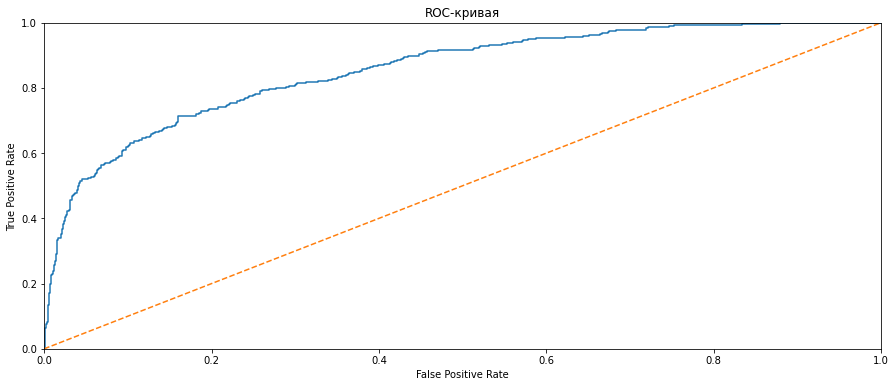

In [108]:
probabilities_valid_rfc = model_rfc.predict_proba(features_valid_df_nopasses)
probabilities_one_valid_rfc = probabilities_valid_rfc[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid_df_nopasses, probabilities_one_valid_rfc) 
plt.figure(figsize=(15, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

## Тестирование модели

In [109]:
%%time
model = RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth = best_depth)
model.fit(features_df_nopasses_upsampled, target_df_nopasses_upsampled)
predicted_test = model.predict(features_test_df_nopasses)
probabilities_valid = model.predict_proba(features_test_df_nopasses)
probabilities_one_valid = probabilities_valid[:, 1]
result_f1_score = f1_score(target_test_df_nopasses, predicted_test)
result_roc_auc_score = roc_auc_score(target_test_df_nopasses, probabilities_one_valid)

Wall time: 1.1 s


In [110]:
print('F1-мера по тестовой выборке равна {}'.format(result_f1_score, result_roc_auc_score))

F1-мера по тестовой выборке равна 0.6192358366271411


In [111]:
print('Метрика AUC-ROC по тестовой выборке равна {}'.format(result_roc_auc_score))

Метрика AUC-ROC по тестовой выборке равна 0.8645410919693625


In [112]:
print('Гиперпараметры n_estimators = {}, max_depth = {}'.format(best_est, best_depth))

Гиперпараметры n_estimators = 100, max_depth = 13


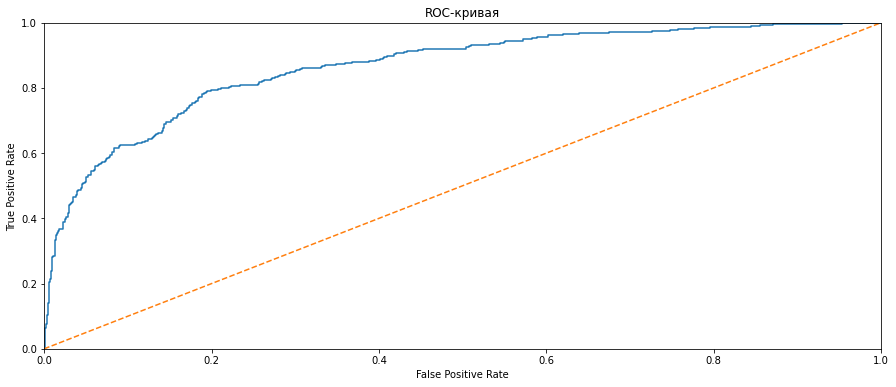

In [113]:
fpr, tpr, thresholds = roc_curve(target_test_df_nopasses, probabilities_one_valid) 
plt.figure(figsize=(15, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

### Вывод

- лучшая модель основана на `RandomForestClassifier`;
- датафрейм с наилучшим результатом - где пропуски были удалены `df_nopasses`;
- наилучшая техника выравнимания - `Upsampling`;
- F1-мера по тестовой выборке равна - `0.6192358366271411`;
- метрика AUC-ROC по тестовой выборке равна - `0.8645410919693625`;
- гиперпараметры `n_estimators=100`, `max_depth=13`.